In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\Diabetes Missing Data.csv")

In [3]:
# Step 1: Assess missing data
missing_percentage = data.isnull().sum() / len(data) * 100
print("Missing Value Percentage:\n", missing_percentage)

Missing Value Percentage:
 Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


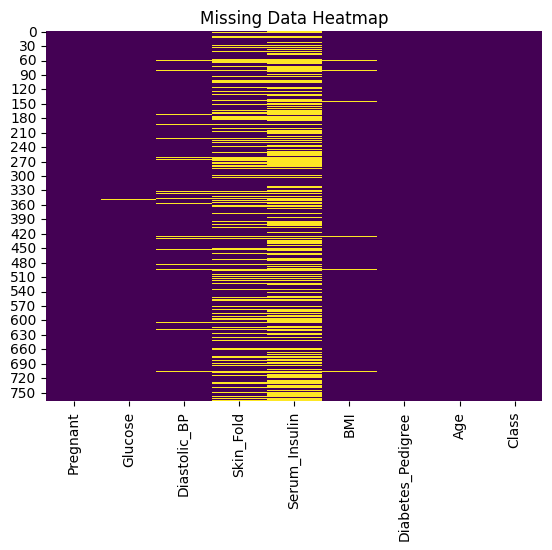

In [4]:
# Step 2: Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [5]:
# Step 3: Handle missing data
# For columns with <5% missing values, use median imputation
for col in data.columns:
    if missing_percentage[col] < 5:
        data[col] = data[col].fillna(data[col].median())  # Solution 1

# For columns with >5% missing values, use KNN imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [6]:
# Step 4: Validate imputation
print("Missing values after imputation:\n", data_imputed.isnull().sum())

Missing values after imputation:
 Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


In [7]:
# Step 5: Save the cleaned dataset
data_imputed.to_csv('Diabetes_Cleaned_Data.csv', index=False)